In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

## data analysis

In [5]:
#checking missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
#exploring data
print('categories in gender column')
print(df.gender.unique())
print('-'*25)
print('\n')

print("categories in race column")
print(df.race_ethnicity.unique())
print('-'*25)
print('\n')

print("categories in parental_level_of_education column")
print(df.parental_level_of_education.unique())
print('-'*25)
print('\n')


print("categories in lunch column")
print(df.lunch.unique())
print('-'*25)
print('\n')

print("categories in test_preparation_course column")
print(df.test_preparation_course.unique())





categories in gender column
['female' 'male']
-------------------------


categories in race column
['group B' 'group C' 'group A' 'group D' 'group E']
-------------------------


categories in parental_level_of_education column
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-------------------------


categories in lunch column
['standard' 'free/reduced']
-------------------------


categories in test_preparation_course column
['none' 'completed']


In [17]:
num_features = [features for features in df.columns if df[features].dtype !='O']
cat_features = [features for features in df.columns if df[features].dtype =='O']

print('numerical featues',len(num_features),num_features)
print('categorical featues',len(cat_features),cat_features)

numerical featues 3 ['math_score', 'reading_score', 'writing_score']
categorical featues 5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [18]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()


print('number of stundents with full marks in math ',math_full)
print('number of stundents with full marks in reading ',reading_full)
print('number of stundents with full marks in writing ',writing_full)



number of stundents with full marks in math  7
number of stundents with full marks in reading  17
number of stundents with full marks in writing  14


In [21]:
reading_less_20 = df[df['reading_score'] <=20]['average'].count()
writing_less_20 = df[df['writing_score'] <=20]['average'].count()
math_less_20 = df[df['math_score'] <=20]['average'].count()


print('number of stundents with full marks in math  less than 20 :  ',math_less_20)
print('number of stundents with full marks in reading less than 20 : ',reading_less_20)
print('number of stundents with full marks in writing less than 20:  ',writing_less_20)

number of stundents with full marks in math  less than 20 :   4
number of stundents with full marks in reading less than 20 :  1
number of stundents with full marks in writing less than 20:   3


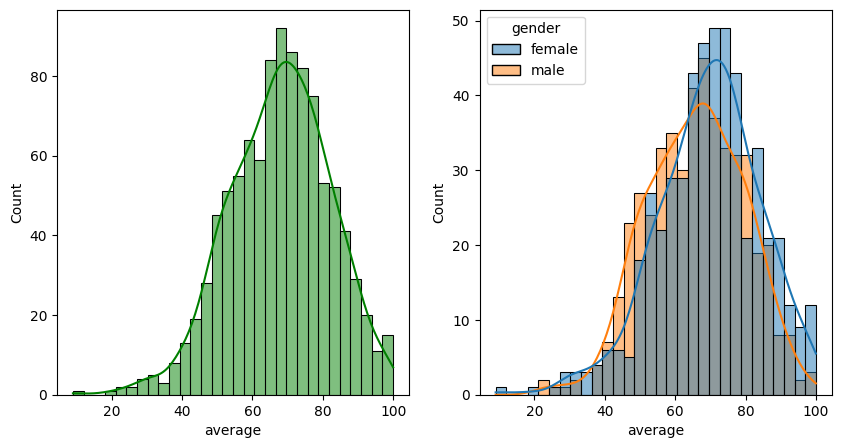

In [23]:
fig , axs = plt.subplots(1,2,figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()

<Axes: xlabel='average', ylabel='Count'>

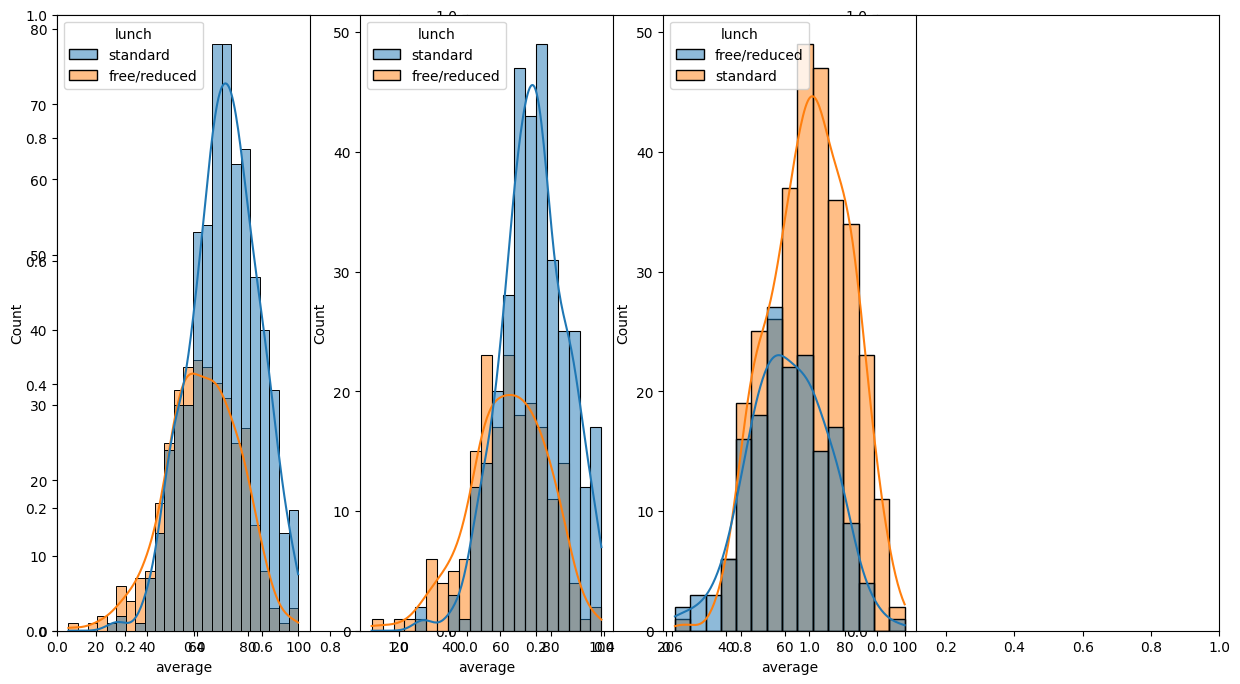

In [24]:
plt.subplots(1,3,figsize=(15,8))
plt.subplot(141)
sns.histplot(data=df,x='average',kde='True',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'],x='average',kde='True',hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'],x='average',kde='True',hue='lunch')